In [1]:
# モジュールのインポート
##  基本的なモジュール
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## lmfit.modelsからフィッティングしたいモデルをインポートする
from lmfit.models import GaussianModel
from lmfit.models import ConstantModel

In [2]:
# 生成データの読み取り
data1 = pd.read_csv('data1_generated.csv')

In [3]:
# columnsがintではなくobjectになっているときのために変換しておく
data1.columns = data1.columns.astype(int)

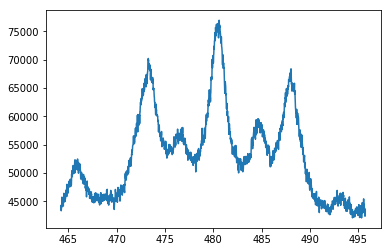

In [4]:
# プロットしたい値を取り出す。
x = np.array(data1[0])
y = np.array(data1[1])

plt.plot(x, y)

In [5]:
# 定常モデルを定義
# パラメータオブジェクトparsの生成
cons = ConstantModel(prefix='cons_')
pars = cons.guess(y, x=x)

[[Model]]
    (((((((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_')) + Model(gaussian, prefix='g4_')) + Model(gaussian, prefix='g5_')) + Model(gaussian, prefix='g6_')) + Model(gaussian, prefix='g7_')) + Model(constant, prefix='cons_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 515
    # data points      = 2046
    # variables        = 22
    chi-square         = 2.3508e+09
    reduced chi-square = 1161461.57
    Akaike info crit   = 28594.6591
    Bayesian info crit = 28718.3792
[[Variables]]
    cons_c:        44650.7384 +/- 53.6438192 (0.12%) (init = 53194.68)
    g1_sigma:      1.15129333 +/- 0.01165232 (1.01%) (init = 1)
    g1_center:     473.161642 +/- 0.01175701 (0.00%) (init = 473.3)
    g1_amplitude:  63751.1479 +/- 682.195013 (1.07%) (init = 10000)
    g1_fwhm:       2.71108856 +/- 0.02743912 (1.01%) == '2.3548200*g1_sigma'
    g1_height:     22090.8337 +/- 125.186242 (0.57%) == '0.3989423*g1_a

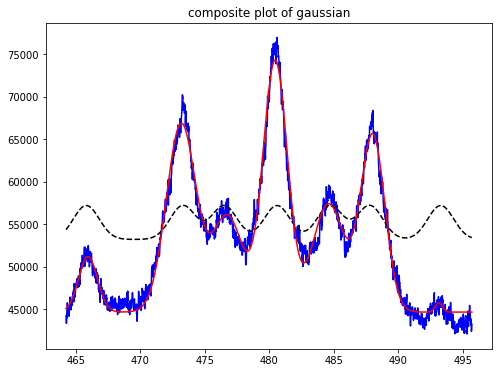

In [8]:
#1つ目のピーク
gauss1 = GaussianModel(prefix='g1_')
pars.update(gauss1.make_params())
pars['g1_center'].set(473.3, min=470, max=475)
pars['g1_sigma'].set(1, min=0.1, max=2)
pars['g1_amplitude'].set(10000, min=1)

#2つ目のピーク
gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())
pars['g2_center'].set(476.5, min=475, max=478)
pars['g2_sigma'].set(1, min=0.1, max=2)
pars['g2_amplitude'].set(10000, min=1)

# 3つ目のピーク
gauss3 = GaussianModel(prefix='g3_')
pars.update(gauss3.make_params())
pars['g3_center'].set(480.6, min=476, max=483)
pars['g3_sigma'].set(1, min=0.1, max=2)
pars['g3_amplitude'].set(10000, min=1)

#4つめのピーク
gauss4 = GaussianModel(prefix='g4_')
pars.update(gauss4.make_params())
pars['g4_center'].set(484.7, min=483, max=487)
pars['g4_sigma'].set(1, min=0.1, max=2)
pars['g4_amplitude'].set(10000, min=1)

#5つ目のピーク
gauss5 = GaussianModel(prefix='g5_')
pars.update(gauss5.make_params())
pars['g5_center'].set(487.8, min=485, max=490)
pars['g5_sigma'].set(1, min=0.1, max=2)
pars['g5_amplitude'].set(10000, min=1)

#6つ目のピーク
gauss6 = GaussianModel(prefix='g6_')
pars.update(gauss6.make_params())
pars['g6_center'].set(465.8, min=465, max=468)
pars['g6_sigma'].set(1, min=0.1, max=2)
pars['g6_amplitude'].set(10000, min=1)

#7つ目のピーク
gauss7 = GaussianModel(prefix='g7_')
pars.update(gauss7.make_params())
pars['g7_center'].set(493.3, min=490, max=494)
pars['g7_sigma'].set(1, min=0.1, max=2)
pars['g7_amplitude'].set(10000, min=1)

# モデルの合成
mod = gauss1 + gauss2 + gauss3  + gauss4 + gauss5 + gauss6 + gauss7 + cons

# 初期値
init = mod.eval(pars, x=x)

# 最適値
out = mod.fit(y, pars, x=x)
# パラメータの情報などを表示
print(out.fit_report(min_correl=0.5))
# 一つ一つのガウシアンを表示するかどうか 
plot_components = False

#　結果のプロット
plt.figure(figsize=(8,6))
plt.plot(x, y, 'b')
plt.plot(x, init, 'k--')
plt.plot(x, out.best_fit, 'r-')
plt.title('composite plot of gaussian')

if plot_components:
    comps = out.eval_components(x=x)
    plt.plot(x, comps['g1_'], 'b--')
    plt.plot(x, comps['g2_'], 'b--')
    plt.plot(x, comps['g3_'], 'b--')
    plt.plot(x, comps['g4_'], 'b--')
    plt.plot(x, comps['g5_'], 'b--')
    plt.plot(x, comps['g6_'], 'b--')
    plt.plot(x, comps['g7_'], 'b--')
    plt.plot(x, comps['cons_'], 'k--')

    plt.show()
plt.savefig('result.jpg')